In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression 

In [3]:
reg = LinearRegression()

In [42]:
# step 1: Load the data
df = pd.read_csv('data.csv')

In [43]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [44]:
# step2: check if the table have any null values
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [45]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [ ]:
# in the above dataset the Height is the dependent variable and the weight is the independent variable
#step3: We will split our data into 2 parts 
    #1. to create the model using simple linear regression algorithm 
    #2. To test how accurate the model is  


In [53]:
x = df['Height']
y= df['Weight']

In [66]:
y

0     52.21
1     53.12
2     54.48
3     55.84
4     57.20
5     58.57
6     59.93
7     61.29
8     63.11
9     64.47
10    66.28
11    68.10
12    69.92
13    72.19
14    74.46
Name: Weight, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x.shape ,y.shape

((15,), (15,))

In [67]:
x = x.values.reshape(-1,1)

In [68]:
#here we will be using 80% of our data to train the model and 20% of the data to test it. 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_test

9     1.70
11    1.75
0     1.47
Name: Height, dtype: float64

In [18]:
y_train

13    72.19
5     58.57
8     63.11
2     54.48
1     53.12
14    74.46
4     57.20
7     61.29
10    66.28
12    69.92
3     55.84
6     59.93
Name: Weight, dtype: float64

In [20]:
x_train = x_train.values.reshape(1,-1)

In [25]:
train_data = pd.DataFrame({'X_train':x_train.flatten() , 'y_train':y_train})


In [29]:
test_data = pd.DataFrame({'X_test':x_test,'Y_train':y_test })

In [31]:
train_data.head()

,X_train,y_train
13,1.80,72.19
5,1.60,58.57
8,1.68,63.11
2,1.52,54.48
1,1.50,53.12


In [69]:
#linear regression works on the formulae = y = mx+c
reg.fit(x_train,y_train)

LinearRegression()

In [71]:
# value of slope
reg.coef_

array([63.13171913])

In [72]:
# value of c
reg.intercept_

-42.178608958837785

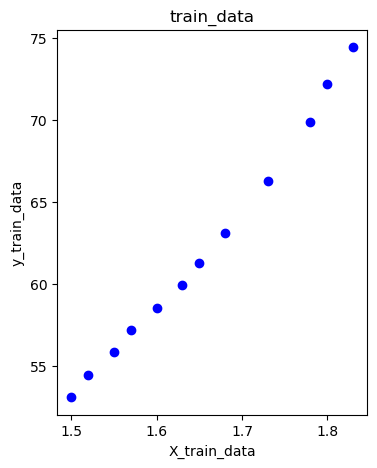

In [75]:
plt.figure(figsize=(4,5))
plt.scatter(x_train,y_train,color='b')
plt.title("train_data")
plt.xlabel('X_train_data')
plt.ylabel('y_train_data')
plt.show()

In [76]:
y_test_prediction = reg.predict(x_test)

In [77]:
y_test_prediction

array([65.14531356, 68.30189952, 50.62501816])

In [80]:
y_test

9     64.47
11    68.10
0     52.21
Name: Weight, dtype: float64

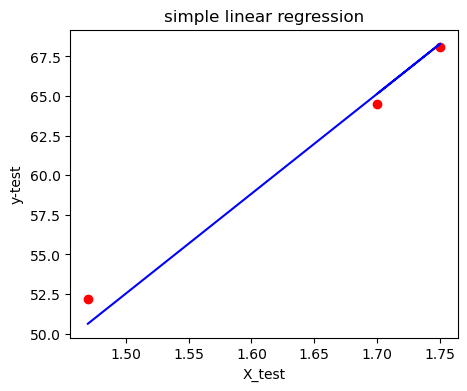

In [82]:
plt.figure(figsize=(5,4))
plt.scatter(x = x_test ,y=y_test,color='r')
plt.plot(x_test ,y_test_prediction , color = 'b')
plt.title('simple linear regression')
plt.xlabel('X_test')
plt.ylabel('y-test')
plt.show()

In [84]:
## The model is predicting the weight 
reg.predict([[2.03]])

array([85.97878087])

In [85]:
# lets find out the accurracy of our model
from sklearn.metrics import r2_score

In [86]:
# the below value shows the accuracy of our ML Model that is 97.8%
print(f'The Test accuracy : {r2_score(y_test , y_test_prediction)}')

The Test accuracy : 0.9782994097388882


In [87]:
# the below value shows the loss value of our ML Model that is 2.1%
print(f'The Test accuracy : {1 - r2_score(y_test , y_test_prediction)}')

The Test accuracy : 0.02170059026111182


In [88]:
y_train_prediction = reg.predict(x_train)

In [89]:
y_train_prediction

array([71.45848547, 58.83214165, 63.88267918, 53.78160412, 52.51896973,
       73.35243705, 56.93819007, 61.9887276 , 67.03926513, 70.19585109,
       55.67555569, 60.72609322])

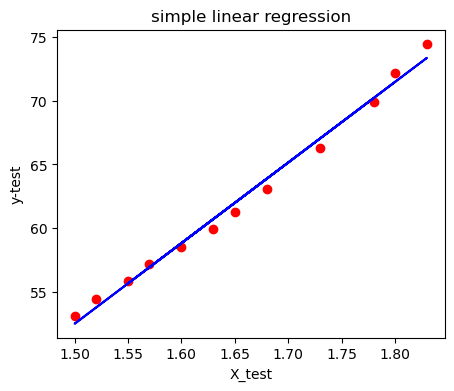

In [90]:
plt.figure(figsize=(5,4))
plt.scatter(x = x_train ,y=y_train,color='r')
plt.plot(x_train ,y_train_prediction , color = 'b')
plt.title('simple linear regression')
plt.xlabel('X_test')
plt.ylabel('y-test')
plt.show()

In [92]:
#if we preict the train data the accurracy % is 99%. But the test accurracy is more important than the train accurracy 
print(f'Training loss will be {r2_score(y_train , y_train_prediction)}')

Training loss will be 0.9907071189933878
